# Лабораторная работа 1. Кодирование данных в телекоммуникационных сетях

Лазарев Эдуард Артемович
N33471

In [1]:
from matplotlib import pyplot as plt

In [2]:
ALPHABET = {
    "А": "C0", "Б": "C1", "В": "C2", "Г": "C3", "Д": "C4", 
    "Е": "C5", "Ж": "C6", "З": "C7", "И": "C8", "Й": "C9", 
    "К": "CA", "Л": "CB", "М": "CC", "Н": "CD", "О": "CE", 
    "П": "CF", "Р": "D0", "С": "D1", "Т": "D2", "У": "D3", 
    "Ф": "D4", "Х": "D5", "Ц": "D6", "Ч": "D7", "Ш": "D8", 
    "Щ": "D9", "Ъ": "DA", "Ы": "DB", "Ь": "DC", "Э": "DD", 
    "Ю": "DE", "Я": "DF", "а": "E0", "б": "E1", "в": "E2", 
    "г": "E3", "д": "E4", "е": "E5", "ж": "E6", "з": "E7", 
    "и": "E8", "й": "E9", "к": "EA", "л": "EB", "м": "EC", 
    "н": "ED", "о": "EE", "п": "EF", "р": "F0", "с": "F1", 
    "т": "F2", "у": "F3", "ф": "F4", "х": "F5", "ц": "F6", 
    "ч": "F7", "ш": "F8", "щ": "F9", "ъ": "FA", "ы": "FB", 
    "ь": "FC", "э": "FD", "ю": "FE", "я": "FF", " ": "20", 
    ",": "2C", ".": "2E", "0": "30", "1": "31", "2": "32", 
    "3": "33", "4": "34", "5": "35", "6": "36", "7": "37", 
    "8": "38", "9": "39", 
}

LOGICAL_ENCODE_TABLE = {
    (0, 0, 0, 0): (1, 1, 1, 1, 0), (0, 0, 0, 1): (0, 1, 0, 0, 1),
    (0, 0, 1, 0): (1, 0, 1, 0, 0), (0, 0, 1, 1): (1, 0, 1, 0, 1),
    (0, 1, 0, 0): (0, 1, 0, 1, 0), (0, 1, 0, 1): (0, 1, 0, 1, 1),
    (0, 1, 1, 0): (0, 1, 1, 1, 0), (0, 1, 1, 1): (0, 1, 1, 1, 1),
    (1, 0, 0, 0): (1, 0, 0, 1, 0), (1, 0, 0, 1): (1, 0, 0, 1, 1),
    (1, 0, 1, 0): (1, 0, 1, 1, 0), (1, 0, 1, 1): (1, 0, 1, 1, 1),
    (1, 1, 0, 0): (1, 1, 0, 1, 0), (1, 1, 0, 1): (1, 1, 0, 1, 1),
    (1, 1, 1, 0): (1, 1, 1, 0, 0), (1, 1, 1, 1): (1, 1, 1, 0, 1),
}

In [3]:
def init_plot(method, message):
    fig, axs = plt.subplots(2, figsize=(18, 10))
    fig.suptitle(method, fontsize=18, fontweight="bold")
    
    def init_ax(ax, title, x_min, x_max):
        ax.set_title(title, fontsize=16)
        ax.set_xlim((x_min, x_max))
        ax.set_ylim((-1.5, 2))
        
        for y in range(-1, 2):
            ax.plot([0, x_max], [y, y], color="aliceblue", linestyle="--")
        
        for idx in range(x_max):
            ax.plot([idx + 1, idx + 1], [-1.5, 2], color="lightgrey", linestyle=("--"  if (idx + 1) % 8 != 0 else "-"))
            ax.text(idx + 0.5, 1.1, str(message[idx]), fontsize=15,
                     verticalalignment="bottom", horizontalalignment="center")
    
    init_ax(axs[0], f"{method} full message", 0, len(message))
    init_ax(axs[1], f"{method} first 4 bites", 0, 32)

    return fig, axs

In [4]:
def NRZ(message, fig_name):
    fig, axs = init_plot("NRZ", message)
    Y_CYCLE = [[0, 0, 0, 0], [1, 1, 1, 1]]
    
    x, y = [], []
    
    for idx, bit in enumerate(message):
        x.extend([idx, idx + 0.5, idx + 0.5, idx + 1])
        y.extend(Y_CYCLE[bit])
    
    axs[0].plot(x, y)
    axs[1].plot(x, y)
    
    extent = axs[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(fig_name, bbox_inches=extent.expanded(1.1, 1.2))

In [5]:
def manchester(message, fig_name):
    fig, axs = init_plot("Manchester", message)
    Y_CYCLE = [[0, 0, 1, 1], [1, 1, 0, 0]]
    
    x, y = [], []
    
    for idx, bit in enumerate(message):
        x.extend([idx, idx + 0.5, idx + 0.5, idx + 1])
        y.extend(Y_CYCLE[bit])
    
    axs[0].plot(x, y)
    axs[1].plot(x, y)
    
    extent = axs[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(fig_name, bbox_inches=extent.expanded(1.1, 1.2))

In [6]:
def RZ(message, fig_name):
    fig, axs = init_plot("RZ", message)
    Y_CYCLE = [[-1, -1, 0, 0], [1, 1, 0, 0]]
    
    x, y = [], []
    
    for idx, bit in enumerate(message):
        x.extend([idx, idx + 0.5, idx + 0.5, idx + 1])
        y.extend(Y_CYCLE[bit])
        
    axs[0].plot(x, y)
    axs[1].plot(x, y)
    
    extent = axs[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(fig_name, bbox_inches=extent.expanded(1.1, 1.2))

In [7]:
def AMI(message, fig_name):
    fig, axs = init_plot("AMI", message)
    Y_CYCLE = [[0, 0, 0, 0], [1, 1, 1, 1], [-1, -1, -1, -1]]
    
    x, y = [], []
    
    step = -1
    for idx, bit in enumerate(message):
        if bit == 1:
            step = (step + 1) % 2
        
        x.extend([idx, idx + 0.5, idx + 0.5, idx + 1])
        y.extend(Y_CYCLE[bit * (step + 1)])
        
    axs[0].plot(x, y)
    axs[1].plot(x, y)
    
    extent = axs[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(fig_name, bbox_inches=extent.expanded(1.1, 1.2))

In [8]:
def MLT_3(message, fig_name):
    fig, axs = init_plot("MLT-3", message)
    Y_CYCLE = [
        [0, 0, 0, 0], [1, 1, 1, 1], 
        [0, 0, 0, 0], [-1, -1, -1, -1],
    ]
    
    x, y = [], []
    
    step = 0
    for idx, bit in enumerate(message):
        if bit == 1:
            step = (step + 1) % 4
        
        x.extend([idx, idx + 0.5, idx + 0.5, idx + 1])
        y.extend(Y_CYCLE[step])
        
    axs[0].plot(x, y)
    axs[1].plot(x, y)
    
    extent = axs[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(fig_name, bbox_inches=extent.expanded(1.1, 1.2))

In [9]:
def method_4B_5B(message):
    encoded_message = []
    for s_idx in range(0, len(message), 4):
        part = tuple(message[s_idx:s_idx+4])
        encoded_message.extend(LOGICAL_ENCODE_TABLE[part])
        
    return encoded_message

In [10]:
def scrambling(message):
    encoded_message = []
    
    for idx, bit in enumerate(message):
        new_bit = bit
        if idx >= 3:
            new_bit ^= encoded_message[idx - 3]
        if idx >= 5:
            new_bit ^= encoded_message[idx - 5]
        encoded_message.append(new_bit)
    
    return encoded_message

In [11]:
text = "Лазарев Э.А."
bin_text = ""

for ch in text:
    new = ALPHABET[ch]
    bin_text += bin(int(new, 16))[2:].zfill(8)
    print(f"{ch} -> {new} ({bin(int(new, 16))[2:].zfill(8)})")

message = list(map(int, bin_text))
    
print(f"\nMessage: {message}")

Л -> CB (11001011)
а -> E0 (11100000)
з -> E7 (11100111)
а -> E0 (11100000)
р -> F0 (11110000)
е -> E5 (11100101)
в -> E2 (11100010)
  -> 20 (00100000)
Э -> DD (11011101)
. -> 2E (00101110)
А -> C0 (11000000)
. -> 2E (00101110)

Message: [1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0]


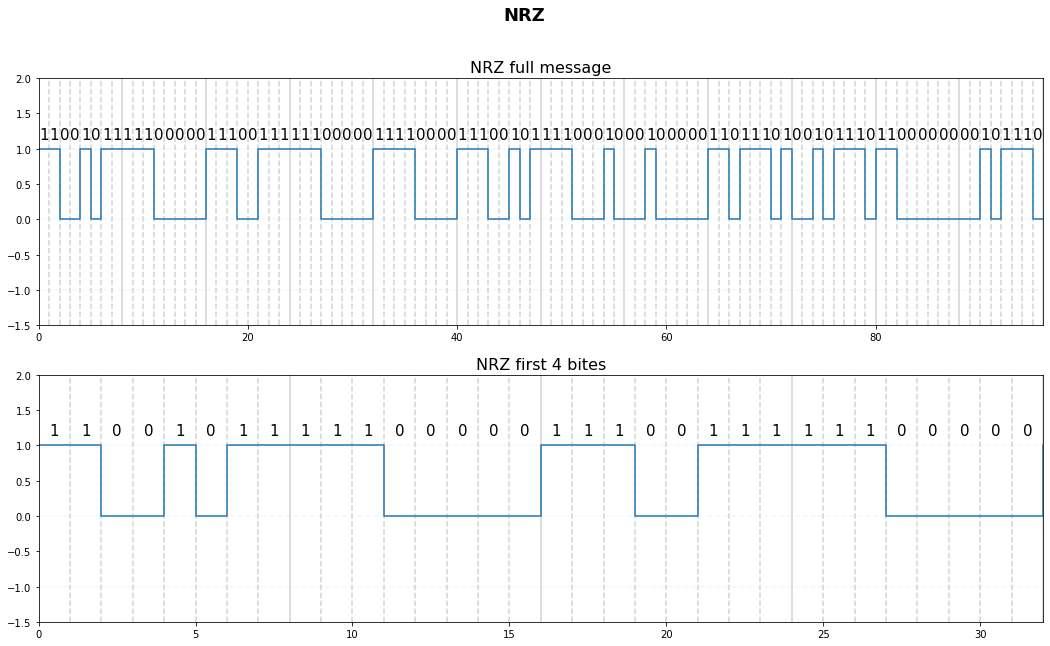

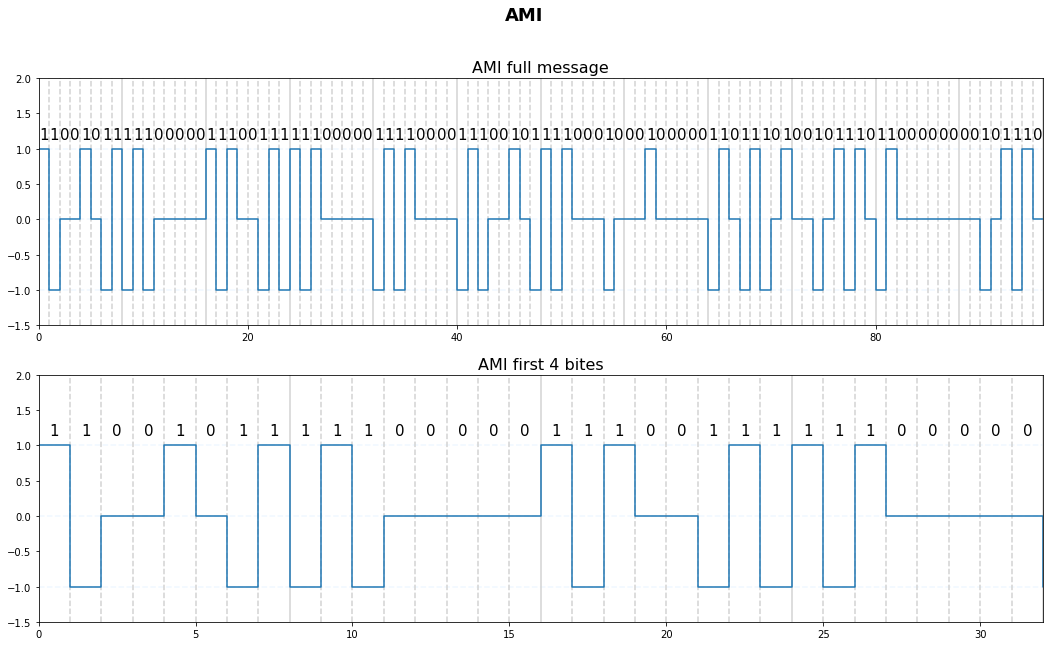

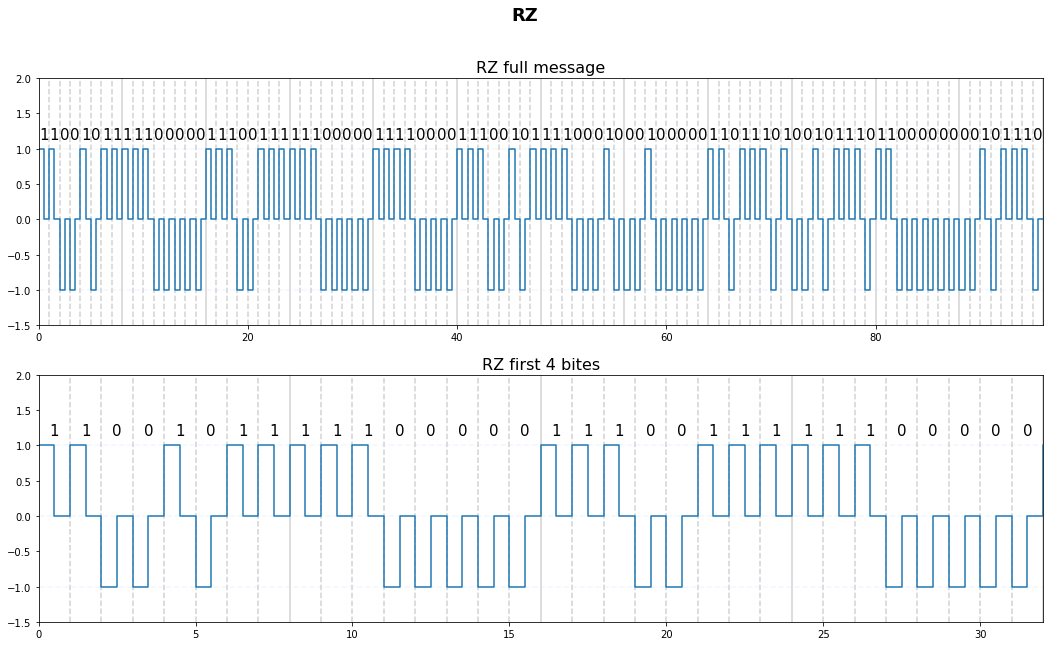

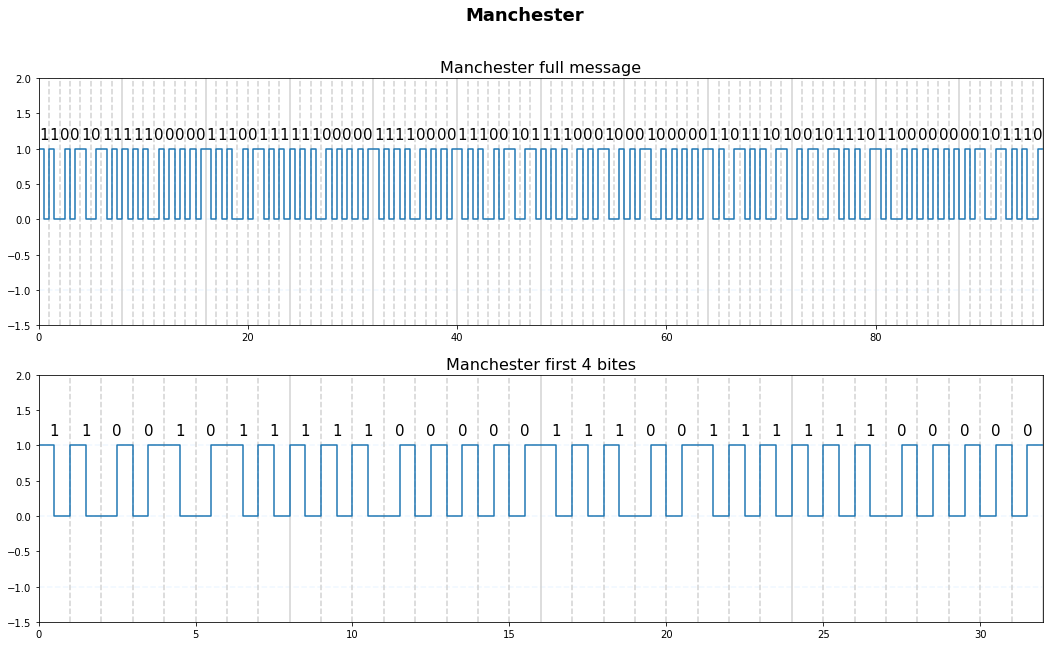

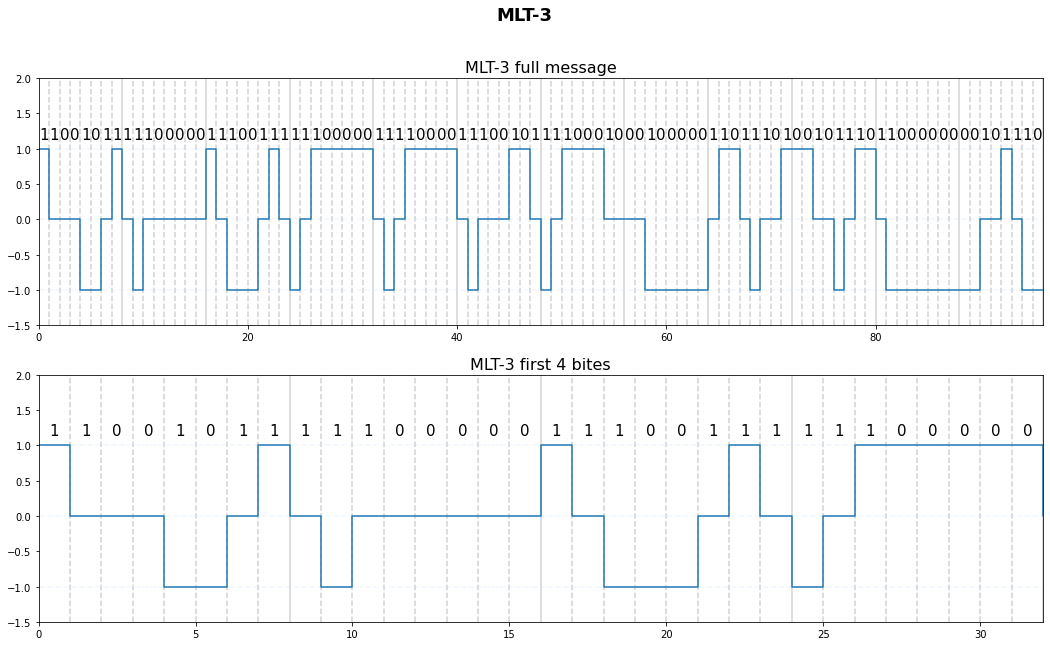

In [12]:
NRZ(message, "images/NRZ_initial_message.png")
AMI(message, "images/AMI_initial_message.png")
RZ(message, "images/RZ_initial_message.png")
manchester(message, "images/manchester_initial_message.png")
MLT_3(message, "images/MLT_3_initial_message.png")

In [13]:
encoded_4B_5B = method_4B_5B(message)

for idx_src, idx_enc in zip(range(0, len(message), 4), range(0, len(encoded_4B_5B), 5)):
     print(f"{''.join(map(str, message[idx_src:idx_src+4]))} -> "
           f"{''.join(map(str, encoded_4B_5B[idx_enc:idx_enc+5]))}")
        
print("\nLogical encoded:")
for idx in range(0, len(encoded_4B_5B), 8):
    bite = "".join(map(str, encoded_4B_5B[idx:idx+8]))
    print(f"{bite} ({hex(int(bite, 2))[2:].upper()})")

1100 -> 11010
1011 -> 10111
1110 -> 11100
0000 -> 11110
1110 -> 11100
0111 -> 01111
1110 -> 11100
0000 -> 11110
1111 -> 11101
0000 -> 11110
1110 -> 11100
0101 -> 01011
1110 -> 11100
0010 -> 10100
0010 -> 10100
0000 -> 11110
1101 -> 11011
1101 -> 11011
0010 -> 10100
1110 -> 11100
1100 -> 11010
0000 -> 11110
0010 -> 10100
1110 -> 11100

Logical encoded:
11010101 (D5)
11111001 (F9)
11101110 (EE)
00111111 (3F)
10011110 (9E)
11101111 (EF)
10111000 (B8)
10111110 (BE)
01010010 (52)
10011110 (9E)
11011110 (DE)
11101001 (E9)
11001101 (CD)
01111010 (7A)
10011100 (9C)


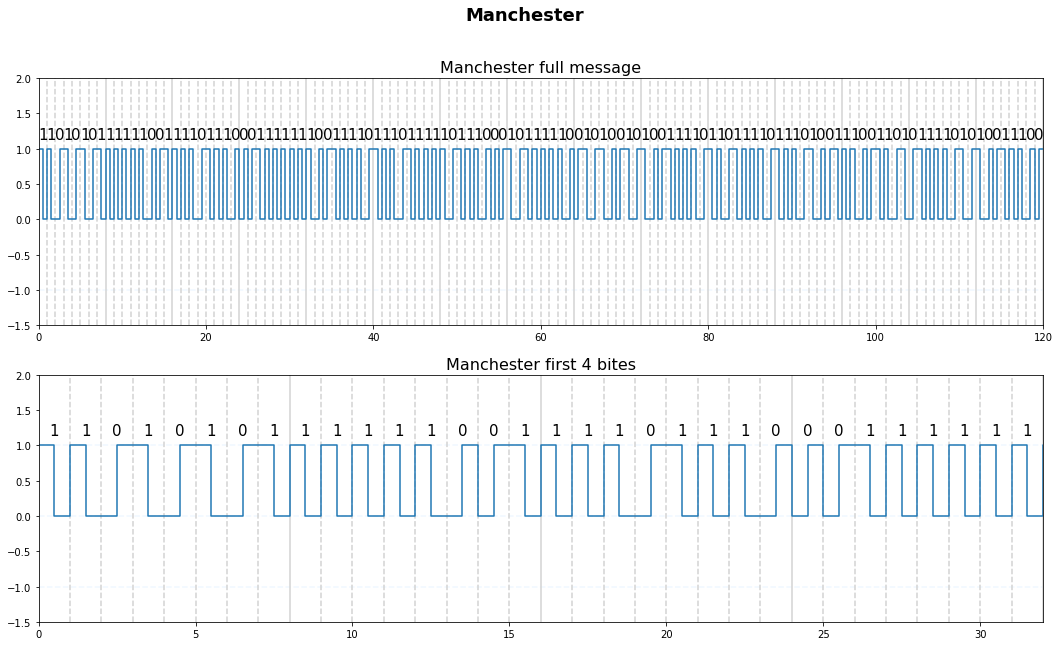

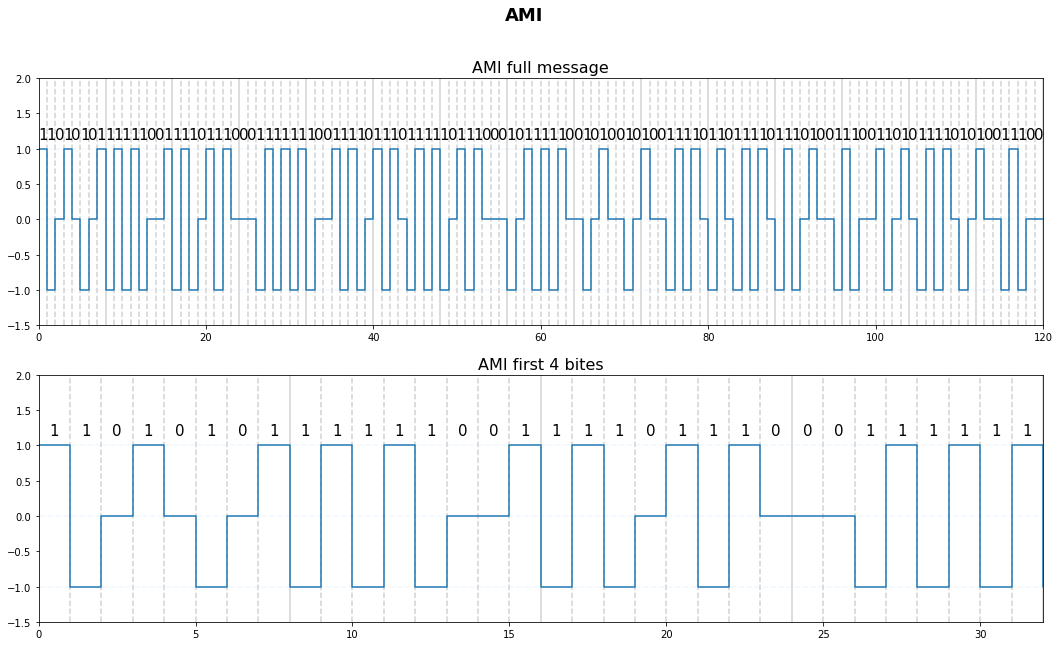

In [14]:
manchester(encoded_4B_5B, "images/manchester_encoded_4b_5B.png")
AMI(encoded_4B_5B, "images/AMI_encoded_4b_5B.png")

In [15]:
scrambled = scrambling(message)

print("idx | A_i | B_i")
print("----+-----+----")
for idx, (bit_src, bit_scrm) in enumerate(zip(message, scrambled)):
    print(f"{idx:3} |  {bit_src}  |  {bit_scrm}")

print("\nScrambled:")
for idx in range(0, len(scrambled), 8):
    bite = "".join(map(str, scrambled[idx:idx+8]))
    print(f"{bite} ({hex(int(bite, 2))[2:].upper()})")

idx | A_i | B_i
----+-----+----
  0 |  1  |  1
  1 |  1  |  1
  2 |  0  |  0
  3 |  0  |  1
  4 |  1  |  0
  5 |  0  |  1
  6 |  1  |  1
  7 |  1  |  1
  8 |  1  |  1
  9 |  1  |  0
 10 |  1  |  1
 11 |  0  |  0
 12 |  0  |  1
 13 |  0  |  0
 14 |  0  |  0
 15 |  0  |  0
 16 |  1  |  1
 17 |  1  |  0
 18 |  1  |  1
 19 |  0  |  1
 20 |  0  |  0
 21 |  1  |  1
 22 |  1  |  0
 23 |  1  |  0
 24 |  1  |  1
 25 |  1  |  1
 26 |  1  |  0
 27 |  0  |  1
 28 |  0  |  1
 29 |  0  |  1
 30 |  0  |  0
 31 |  0  |  1
 32 |  1  |  1
 33 |  1  |  0
 34 |  1  |  1
 35 |  1  |  0
 36 |  0  |  1
 37 |  0  |  0
 38 |  0  |  0
 39 |  0  |  0
 40 |  1  |  1
 41 |  1  |  0
 42 |  1  |  1
 43 |  0  |  1
 44 |  0  |  0
 45 |  1  |  1
 46 |  0  |  1
 47 |  1  |  0
 48 |  1  |  1
 49 |  1  |  0
 50 |  1  |  0
 51 |  0  |  0
 52 |  0  |  0
 53 |  0  |  1
 54 |  1  |  1
 55 |  0  |  0
 56 |  0  |  1
 57 |  0  |  1
 58 |  1  |  0
 59 |  0  |  0
 60 |  0  |  1
 61 |  0  |  1
 62 |  0  |  1
 63 |  0  |  1
 64 |  1

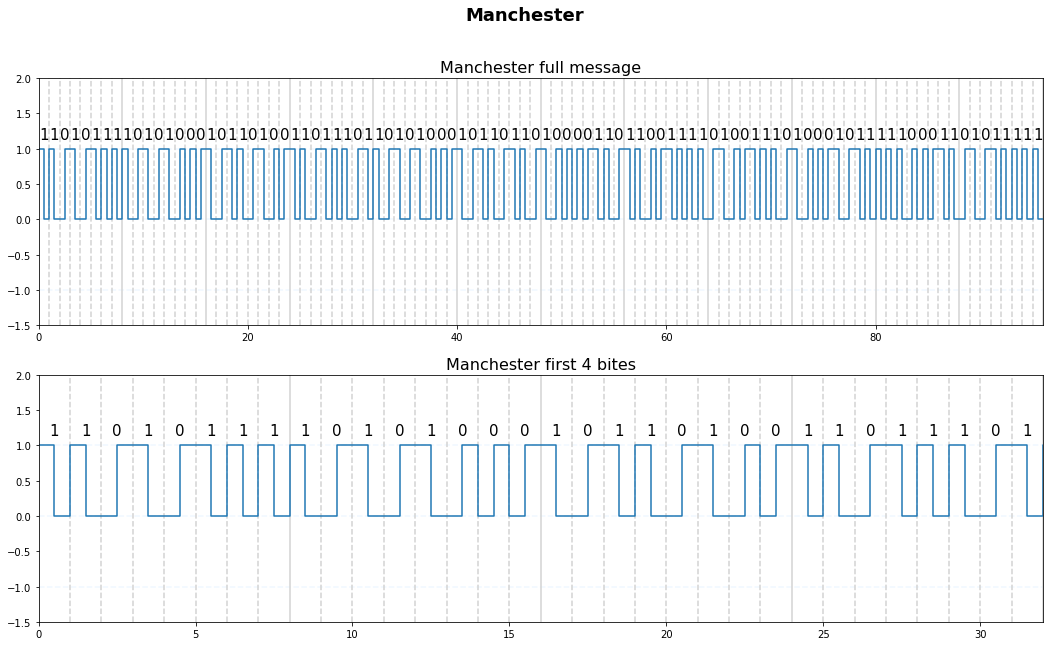

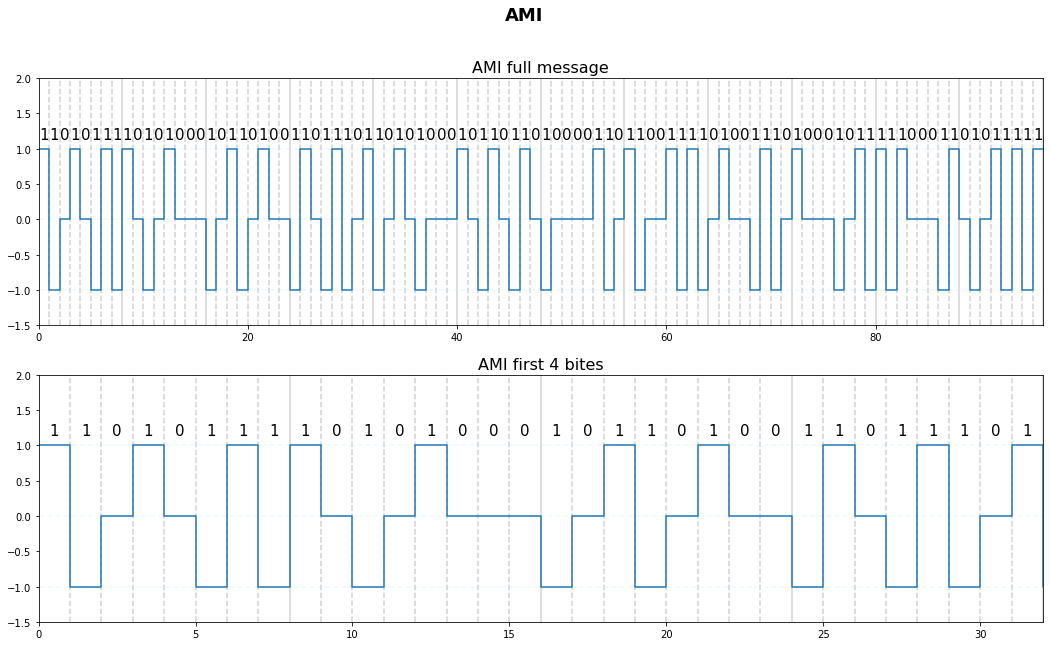

In [16]:
manchester(scrambled, "images/manchester_scrambled.png")
AMI(scrambled, "images/AMI_scrambled.png")